In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import time
import numpy as np

<IPython.core.display.Javascript object>


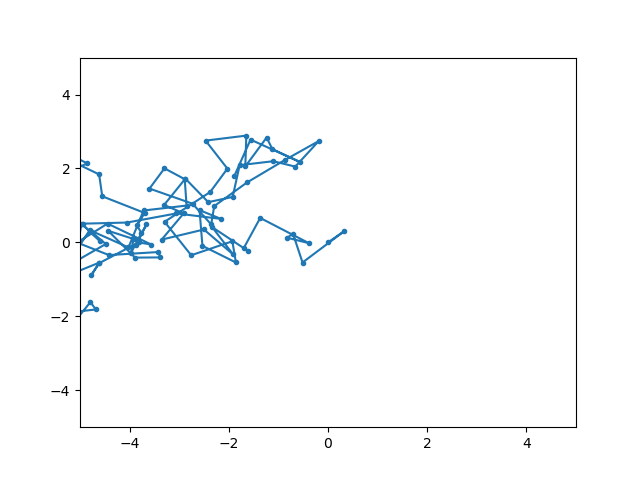

In [14]:
fig, ax = plt.subplots()
line, = plt.plot([0], [0], '.-')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
plt.show()

In [15]:
jmax = 100
x = 0.0
y = 0.0

for i in range(jmax+1):
    x += (np.random.random() - 0.5)*2
    y += (np.random.random() - 0.5)*2
    xs, ys = line.get_data()
    xs = np.append(xs, [x])
    ys = np.append(ys, [y])
    line.set_data(xs, ys)
    fig.canvas.draw()
    time.sleep(.2)

In [38]:
print("r actual =", np.sqrt(x**2 + y**2))
print("r expected =", np.sqrt(jmax) * .75)

r actual = 2.605196559445615
r expected = 7.5


<IPython.core.display.Javascript object>


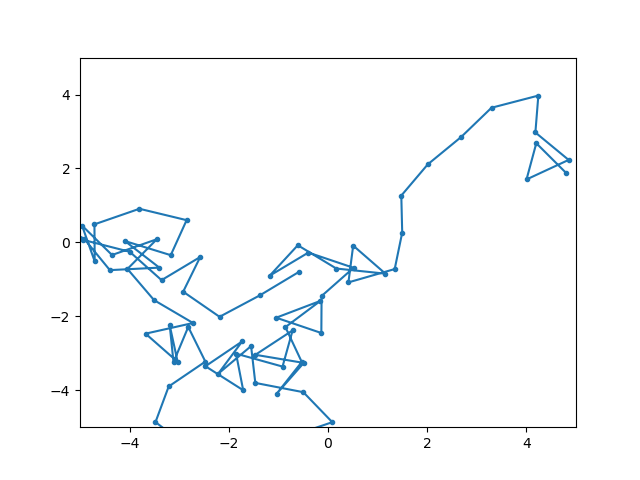

In [46]:
fig, ax = plt.subplots()
line, = plt.plot([0], [0], '.-')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
plt.show()

In [47]:
def rwalk(size):
    xs = (np.random.random(size) - 0.5) * 2
    ys = (np.random.random(size) - 0.5) * 2

    r = np.sqrt(xs**2 + ys**2)
    xs /= r
    ys /= r
    
    xloc = np.cumsum(xs)
    yloc = np.cumsum(ys)
    
    return xloc, yloc

In [48]:
xloc, yloc = rwalk(jmax)
for i in range(jmax):
    line.set_data(xloc[:i], yloc[:i])
    fig.canvas.draw()
    time.sleep(.2)

<IPython.core.display.Javascript object>


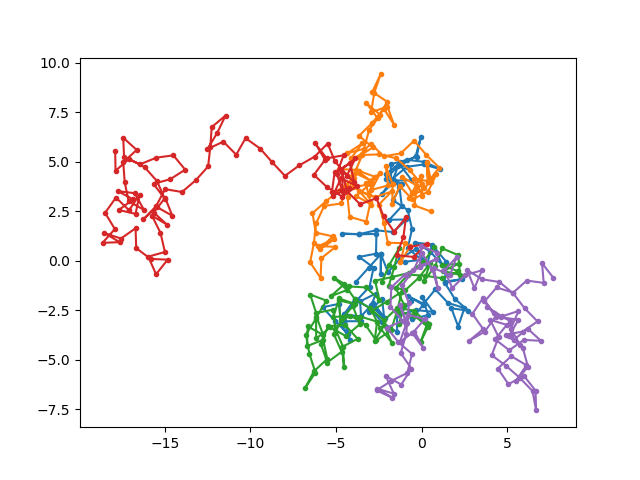

In [49]:
fig, ax = plt.subplots()
for i in range(5):
    plt.plot(*rwalk(jmax), '.-')

plt.show()

In [40]:
def rwalksum(size):
    xs = (np.random.random(size) - 0.5) * 2
    ys = (np.random.random(size) - 0.5) * 2
    
    r = np.sqrt(xs**2 + ys**2)
    xs /= r
    ys /= r

    xloc = np.sum(xs)
    yloc = np.sum(ys)
    
    return np.sqrt(xloc**2 + yloc**2)

In [41]:
vals = np.empty(100_000, dtype=np.float64)
for i in range(len(vals)):
    vals[i] = rwalksum(jmax)

<IPython.core.display.Javascript object>


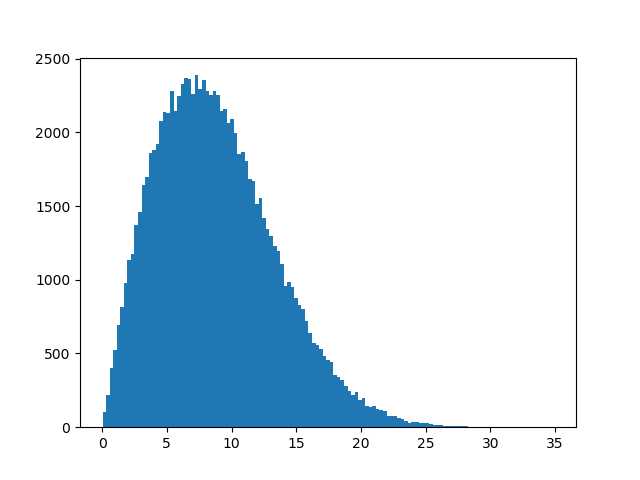

In [42]:
fig, ax = plt.subplots()
ax.hist(vals, bins='auto')
plt.show()

In [43]:
np.mean(vals)

8.829272225067449

In [63]:
particles = 10000
decay_prob = 0.1
decays = []

for time in range(1000):
    for particle in range(particles):
        decay = np.random.random()
        if decay < decay_prob:
            particles -= 1
            decays.append(time)

<IPython.core.display.Javascript object>


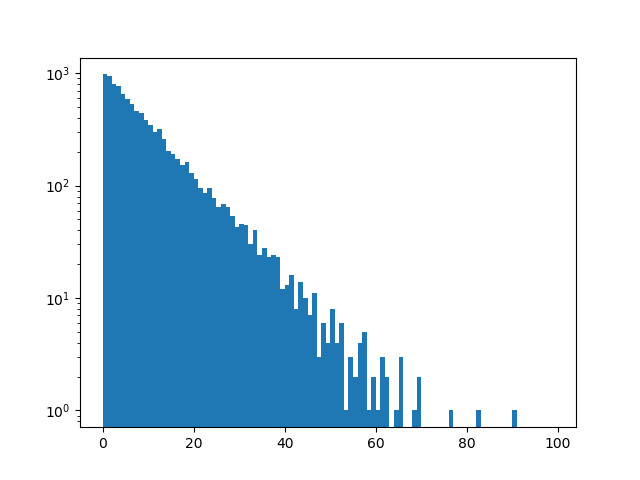

In [65]:
fig, ax = plt.subplots()
ax.hist(decays, bins=range(100))
ax.set_yscale('log')
plt.show()